# Part II - (Loan Data from Prosper - Findings)
## by (Michèle Nkuimi)

## Investigation Overview

> Due to the fact that I have no prior knowledge of loans(via banks or lenders), I have done some research online. This research enabled me choose the variables to focus on and the relationships between them:
<br>
* ‘BorrowerRate’: when you take a loan, you have to pay the amount back plus interest; 
<br>
* ‘StatedMonthlyIncome’, ‘AvailableBankcardCredit’ and ‘EmploymentStatus’: To get a loan you have to qualify.
<br>
* ‘ProsperScore’, ‘TotalCreditLinespast7years’, ‘DelinquenciesLast7Years’:  good credit records augment your chances of getting a loan.




## Dataset Overview

>  The dataset contains data for 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income and more.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
dataset = pd.read_csv('C:\\Users\\michèle_nkuimi\\Downloads\\project5-db\\prosperLoanData.csv')


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Correlation coefficient between variables)

> A correlation coefficient is used to measure the strength of the linear relationship between two variables. A correlation coefficient greater than zero indicates a positive relationship(when one variable moves, the other variable moves in the same direction) while a value less than zero signifies a negative relationship(when one variable moves, the other variable moves in the opposite direction).

> From the correlation matrix below I can see that there is no strong relationship between my selected variables. Most of the correlation coefficients are weak or negligible.

> The one and only moderate correlation coefficient(-0.65) is between ProsperScore and BorrowerRate. This indicates that when ProsperScore increases, BorrowerRate decreases which is in this context good. It is less risky for Prosper to loan money to people with a good credibilty.

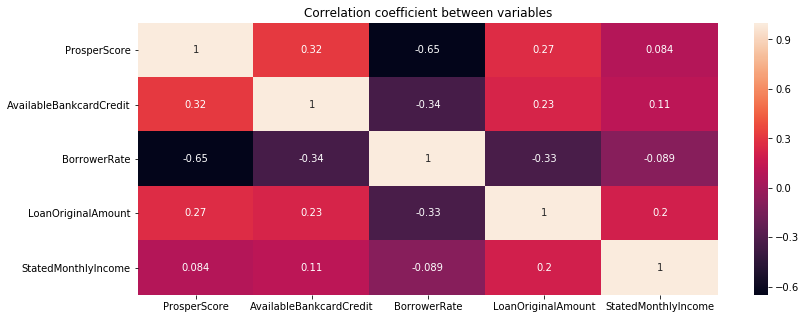

In [3]:
# Plotting a standard-scaled plot

plt.figure(figsize=(13,5))
dataset1 = pd.DataFrame(dataset,columns=['ProsperScore', 'AvailableBankcardCredit', 'BorrowerRate','LoanOriginalAmount', 'StatedMonthlyIncome'])
corrMatrix = dataset1.corr()
sb.heatmap(corrMatrix, annot=True)
plt.title('Correlation coefficient between variables');

## (BorrowerRate vs ProsperScore throughout years)

> Below is a quite interesting figure to have a quick insight of how Prosper has been doing during the years. For example, investors can see how many total loans Prosper granted to borrowers, at what interest rate, in which year and what type of credit score these borrowers have. 

> The x-axis represents the amount ot loan per prosper score ranges(from 1 till 11); which is also the vertical grid lines on the figure.

> for example: in 2013 Prosper granted a huge amount of loans and all the borrowers had a prosper score from 5 and more at different interest rates,  either very high or very low.

> During the years 2008 up until 2011 the amount of loans must have been extremely low. Prosper was probably hit by the global economic crisis that existed at that time.

> Loans granted at the highest interest rate took place in 2007 to, not surprisingly, borrowers with a lower prosper rate.

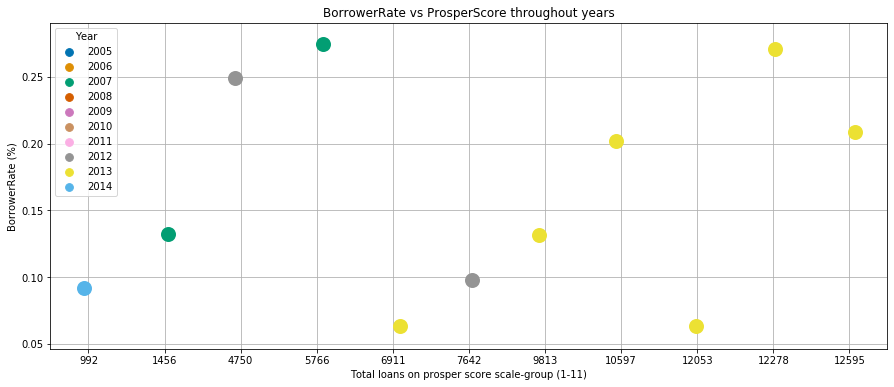

In [4]:
plt.figure(figsize=(15,6))

dataset['ListingCreationDate'] = pd.to_datetime(dataset.ListingCreationDate, format='%Y-%m-%d %H:%M:%S')
dataset['Year'] = dataset['ListingCreationDate'].dt.year
gk = dataset['ProsperScore'].value_counts()
ax = sb.stripplot(x=gk, y='BorrowerRate', hue="Year", size= 15, palette="colorblind", jitter=True, data=dataset)  
ax.grid(True)
plt.xlabel('Total loans on prosper score scale-group (1-11)')
plt.ylabel('BorrowerRate (%)')
plt.title('BorrowerRate vs ProsperScore throughout years');

## (EmploymentStatus & LoanOriginalAmount throughout years)

> It is hard to tell from the figure below how the trend of the employment status of borrowers versus the original loan amount was because We can see some peaks that changed from year to year. For example during six years(2009-2014) people who are employed got higher loan amounts. In 2007-2008-2009-2013 borrowers without a job got lower loan amount.

> It seems as if full-time workers receive higher loans throughout the years.

> In 2008 the amount of loans started to decrease, stayed low until 2010 and increased again in 2011 until 2014.





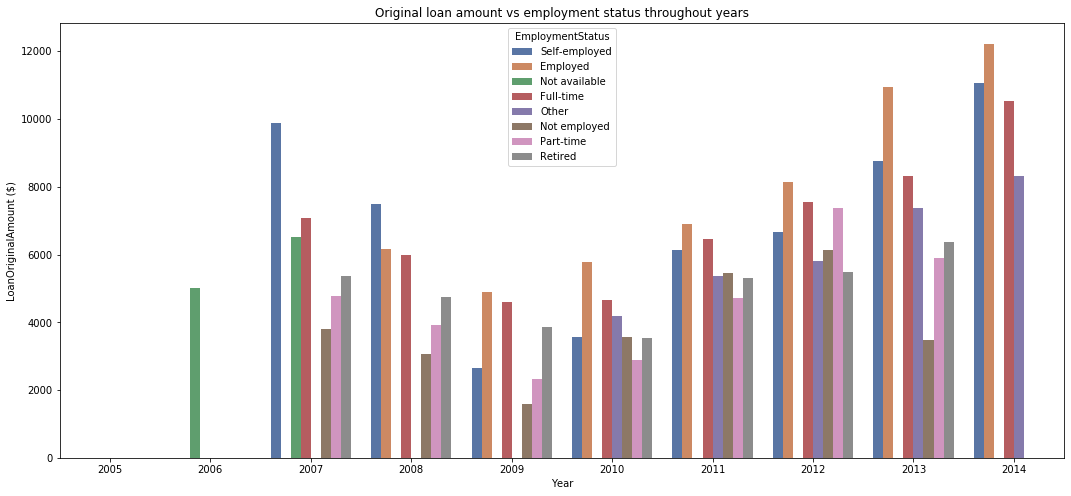

In [5]:
plt.figure(figsize=(18,8))
ax=sb.barplot(x='Year', y='LoanOriginalAmount', hue='EmploymentStatus',  palette="deep", ci= None, data=dataset)
plt.ylabel('LoanOriginalAmount ($)')
plt.xlabel('Year')
plt.title('Original loan amount vs employment status throughout years');

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 